In [1]:
import sys
sys.path.append('/Users/mariana/Documents/projects/Graphs/egnn')
from ae_datasets import d_selector, Dataloader
from ae_datasets.d_creator import max_n_nodes, DatasetCommunity, DatasetErdosRenyiNodes
import graph as gl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset_name = 'erdosrenyinodes_0.15_none'
dataset_name = 'community_ours'
dataset = d_selector.retrieve_dataset(dataset_name, partition='train', directed=True)

Creating dataset with  2  communities


In [3]:
len(dataset.graphs)

5000

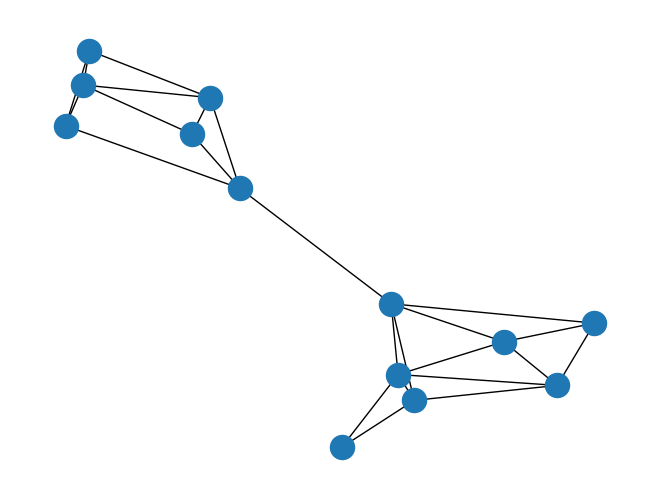

In [6]:
gl.plot_graph(dataset.graphs[1])

In [22]:
g = dataset.graphs[1]

In [23]:
adj = g.get_adjacency()

In [24]:
adj

tensor([[0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.]])

In [25]:
n1 = gl.graph2networkx(dataset.graphs[1])
n2 = gl.graph2networkx(dataset.graphs[2])

In [26]:
nx.is_isomorphic(n1, n2)

False

In [29]:
a1 = nx.adjacency_matrix(n1).toarray()

In [32]:
P = np.eye(a1.shape[0])
idx = np.arange(P.shape[0])
np.random.shuffle(idx)
P = P[idx, :]

array([ 6, 10,  5,  4,  1,  2,  7,  3, 12, 11,  9,  0,  8])

In [35]:
perm1 = P @ a1 @ P.T

In [38]:
perm_n1 = nx.from_numpy_array(perm1)

In [39]:
nx.is_isomorphic(n1, perm_n1)

True